# FNN and Random Forest Code

In [85]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("New_NBA_Salaries_dataset.csv")
#checking data types and the df
print(df.dtypes)
df

Unnamed: 0         int64
Player Name       object
Salary             int64
Position          object
Age                int64
Team              object
GP                 int64
GS                 int64
MP               float64
FG               float64
eFG%             float64
FT               float64
ORB              float64
DRB              float64
TRB              float64
AST              float64
STL              float64
BLK              float64
TOV              float64
PF               float64
PTS              float64
Total Minutes      int64
PER              float64
TS%              float64
3PAr             float64
FTr              float64
AST%             float64
STL%             float64
BLK%             float64
TOV%             float64
USG%             float64
OWS              float64
DWS              float64
WS               float64
WS/48            float64
BPM              float64
VORP             float64
dtype: object


,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,1.3,0.9,12.5,31.0,5.8,2.0,7.8,0.192,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,1.8,1.4,17.1,27.0,-0.4,0.7,0.3,0.020,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,1.7,1.3,18.4,27.7,-0.6,2.6,1.9,0.044,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,1.2,1.4,11.6,33.3,3.2,2.4,5.6,0.138,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,1.0,3.4,13.4,30.7,4.7,2.1,6.8,0.194,7.1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,400,Anthony Lamb,694878,SF,25,GSW,62,4,19.3,2.4,...,1.1,1.5,13.7,13.8,1.2,1.2,2.4,0.096,-1.1,0.3
401,401,Michael Carter-Williams,652829,PG,31,ORL,4,0,11.0,1.5,...,1.1,2.2,19.0,20.6,0.0,0.0,0.0,-0.003,-6.3,0.0
402,402,Carlik Jones,612162,PG,25,CHI,7,0,8.0,0.9,...,1.7,0.0,9.7,16.2,0.0,0.1,0.1,0.078,-2.5,0.0
403,403,Trevor Keels,520589,SG,19,NYK,3,0,2.7,0.3,...,0.0,0.0,0.0,21.4,0.0,0.0,0.0,-0.062,-13.0,0.0


In [87]:
#remove non-numerical columns and non-useful columns
df = df.drop(columns=["Unnamed: 0", "Player Name", "Team", "Position"])

#salary is my dependent variable
y = df["Salary"]
df

,Salary,Age,GP,GS,MP,FG,eFG%,FT,ORB,DRB,...,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,BPM,VORP
0,48070014,34,56,56,34.7,10.0,0.614,4.6,0.7,5.4,...,1.3,0.9,12.5,31.0,5.8,2.0,7.8,0.192,7.5,4.7
1,47345760,32,34,3,22.2,4.1,0.457,2.3,0.4,2.3,...,1.8,1.4,17.1,27.0,-0.4,0.7,0.3,0.020,-1.2,0.1
2,47080179,34,73,24,29.1,5.9,0.481,2.8,1.2,4.6,...,1.7,1.3,18.4,27.7,-0.6,2.6,1.9,0.044,0.2,1.2
3,44474988,38,55,54,35.5,11.1,0.549,4.6,1.2,7.1,...,1.2,1.4,11.6,33.3,3.2,2.4,5.6,0.138,6.1,4.0
4,44119845,34,47,47,35.6,10.3,0.614,6.5,0.4,6.3,...,1.0,3.4,13.4,30.7,4.7,2.1,6.8,0.194,7.1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,694878,25,62,4,19.3,2.4,0.588,0.7,0.9,2.6,...,1.1,1.5,13.7,13.8,1.2,1.2,2.4,0.096,-1.1,0.3
401,652829,31,4,0,11.0,1.5,0.464,1.0,0.3,1.0,...,1.1,2.2,19.0,20.6,0.0,0.0,0.0,-0.003,-6.3,0.0
402,612162,25,7,0,8.0,0.9,0.500,0.7,0.1,0.6,...,1.7,0.0,9.7,16.2,0.0,0.1,0.1,0.078,-2.5,0.0
403,520589,19,3,0,2.7,0.3,0.375,0.0,0.0,0.7,...,0.0,0.0,0.0,21.4,0.0,0.0,0.0,-0.062,-13.0,0.0


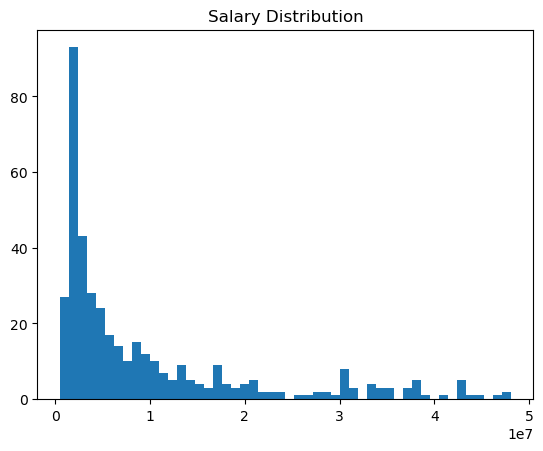

In [5]:
import matplotlib.pyplot as plt
#plot to show salary distribution
#check if normal or not
plt.hist(y, bins=50)
plt.title("Salary Distribution")
plt.show()


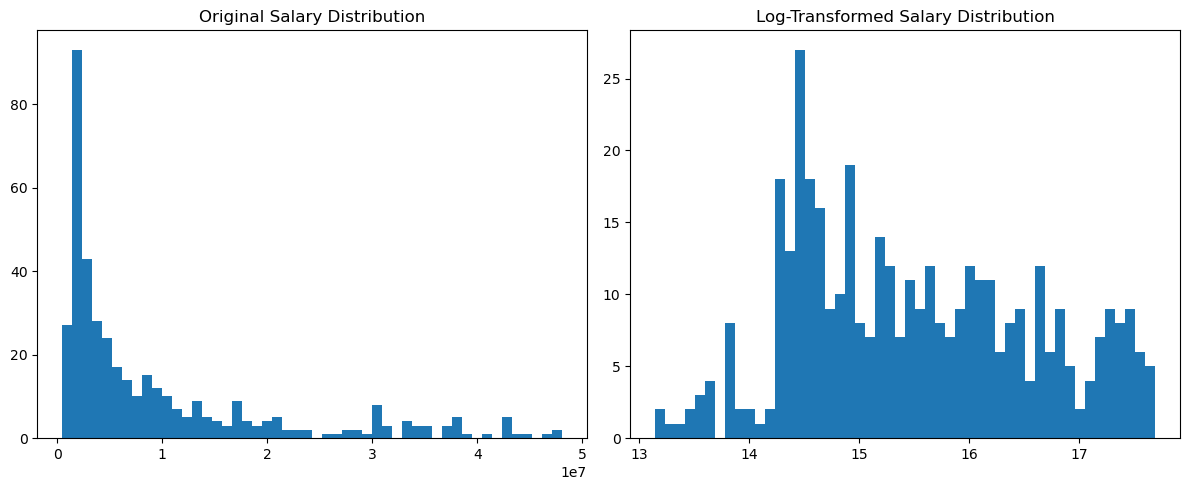

In [89]:
#original salary is not normal, check to see if log transform fixes it
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(y, bins=50)
plt.title("Original Salary Distribution")

plt.subplot(1, 2, 2)
plt.hist(np.log1p(y), bins=50)
plt.title("Log-Transformed Salary Distribution")

plt.tight_layout()
plt.show()


Log Transform does a good enough job. Not a perfect bell curve, but looks more normal and unimodal.

Have to scale X matrix because FNN is very senstive to outliers and needs to be normalized.

In [95]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_log_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

#Log-transform salary
y_log = np.log1p(y)
X = df.drop('Salary', axis = 1)

#Train-test split
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

#Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

First FNN model with 3 hidden layers.

In [99]:
#FNN
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
#adam is optimizer for backprop.
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#Train
history = model.fit(X_train_scaled, y_train_log, validation_split=0.2, epochs=100, batch_size=16, verbose=0)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 55,537,750.19
R² Score: -373.8624
MSLE: 2.1318


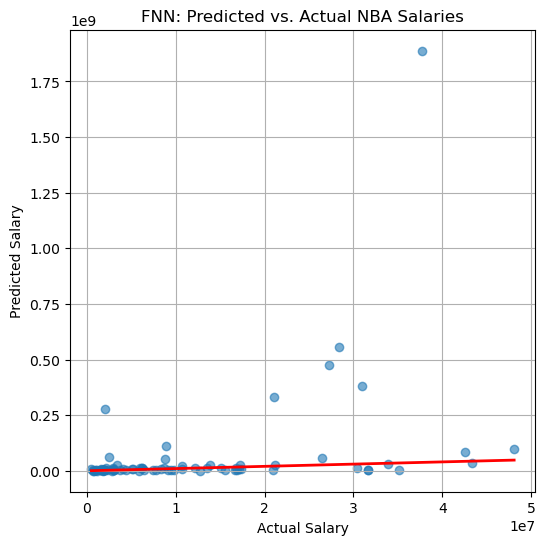

In [101]:
#predict in log, then reverse for evaluation
#reversing makes interpretting output easier
y_pred_log = model.predict(X_test_scaled).flatten()
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)

#model evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)

print(f"MAE: {mae:,.2f}")
print(f"R² Score: {r2:.4f}")
print(f"MSLE: {msle:.4f}")

#Predicted vs Actual Plot for visual purposes
#want to see data following line closely
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("FNN: Predicted vs. Actual NBA Salaries")
plt.grid(True)
plt.show()

This is our test for overfitting and underfitting. Since the validation loss and training loss follow a similar smooth sloping line, we can determine that there is no overfitting or underfitting problems.

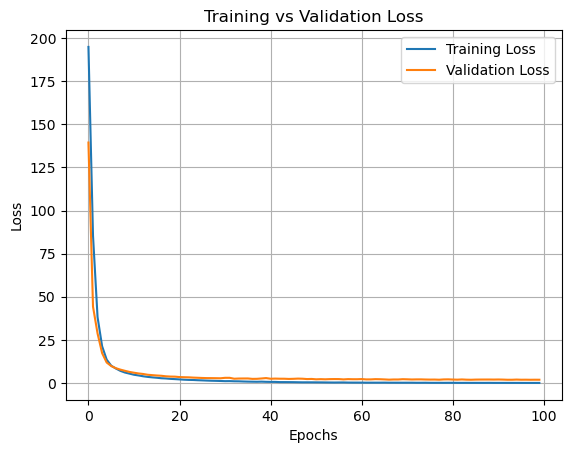

In [104]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.show()

Second FNN with more layers and more epochs. This may help the model train better and get better testing output.

In [107]:
#increased layers for FNN
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#Train
history = model.fit(X_train_scaled, y_train_log, validation_split=0.2, epochs=1000, verbose=0)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
MAE: 27,815,267.80
R² Score: -75.0958
MSLE: 1.5751


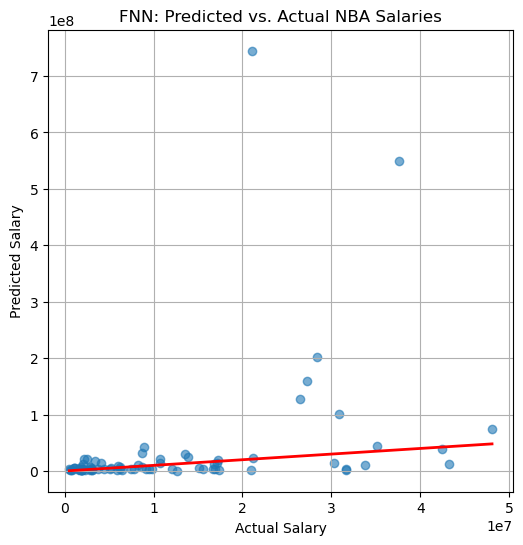

In [108]:
y_pred_log = model.predict(X_test_scaled).flatten()
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)

#eval metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)

print(f"MAE: {mae:,.2f}")
print(f"R² Score: {r2:.4f}")
print(f"MSLE: {msle:.4f}")

#plot for viz
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("FNN: Predicted vs. Actual NBA Salaries")
plt.grid(True)
plt.show()

Third FNN with less layers and more epochs. Hopefully this will get better testing results.

In [114]:
#3rd FNN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
history = model.fit(X_train_scaled, y_train_log, validation_split=0.2, epochs=1000, verbose=0)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
MAE: 52,667,346.58
R² Score: -226.2587
MSLE: 2.0162


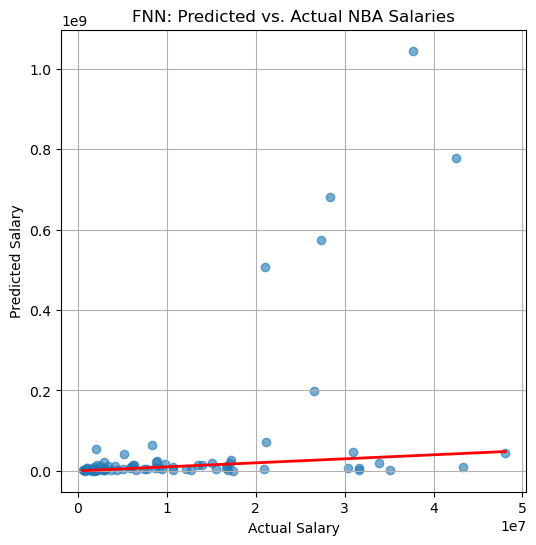

In [115]:
y_pred_log = model.predict(X_test_scaled).flatten()
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)

#eval metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)

print(f"MAE: {mae:,.2f}")
print(f"R² Score: {r2:.4f}")
print(f"MSLE: {msle:.4f}")

#plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("FNN: Predicted vs. Actual NBA Salaries")
plt.grid(True)
plt.show()

Outliers may be the problem. Taking out some of the outliers may help with the FNN model. Making the dataset smaller may not help the FNN. FNN's are usually used for very large datasets and our dataset is relatively small.

In [119]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#Calculate the IQR for each numeric column
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

#Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Identify rows with outliers
outliers = ((df[numeric_features] < lower_bound) | (df[numeric_features] > upper_bound))

#Filter out the rows with outliers
df_clean = df[~outliers.any(axis=1)]

#Check the shape of the cleaned data
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")

Original dataset shape: (405, 33)
Cleaned dataset shape: (247, 33)


In [121]:
#make new independent and dependent variables for the cleaned dataset
y_log = np.log1p(df_clean['Salary'])
X = df_clean.drop('Salary', axis = 1)

#Train-test split
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

#Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [123]:
#origianl FNN model with cleaned data
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#Train
history = model.fit(X_train_scaled, y_train_log, validation_split=0.2, epochs=1000, verbose=0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
MAE: 97,743,461.67
R² Score: -3978.0146
MSLE: 4.5922


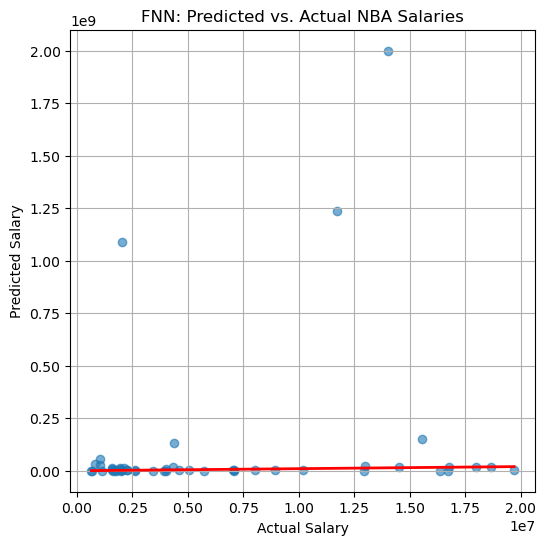

In [124]:
#Predict in log space, then reverse for eval
y_pred_log = model.predict(X_test_scaled).flatten()
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)

#eval metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)

print(f"MAE: {mae:,.2f}")
print(f"R² Score: {r2:.4f}")
print(f"MSLE: {msle:.4f}")

#plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("FNN: Predicted vs. Actual NBA Salaries")
plt.grid(True)
plt.show()

**Random Forest**

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

#use original data with transform, not cleaned data
y_log = np.log1p(df['Salary'])
X = df.drop('Salary', axis = 1)

#Train-test split
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [130]:
#Train Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train_log)

#predict
y_pred_log = rf.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)

In [132]:
#evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)

print(f"MAE: {mae:,.2f}")
print(f"R² Score: {r2:.4f}")
print(f"MSLE: {msle:.4f}")

MAE: 3,836,162.08
R² Score: 0.7718
MSLE: 0.4164


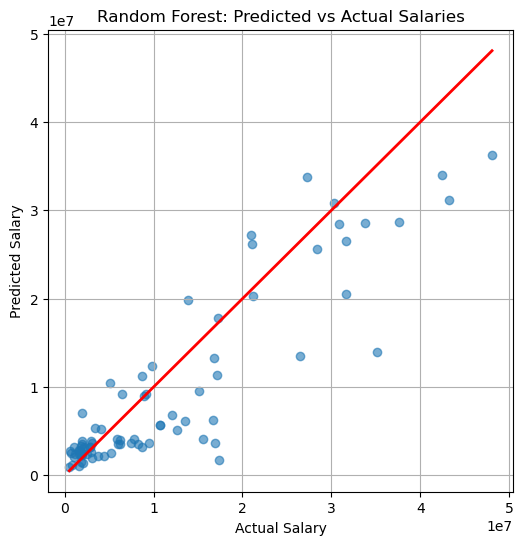

In [157]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Random Forest: Predicted vs Actual Salaries")
plt.grid(True)
plt.show()

Running feature importance to see if we can't make a stronger model.

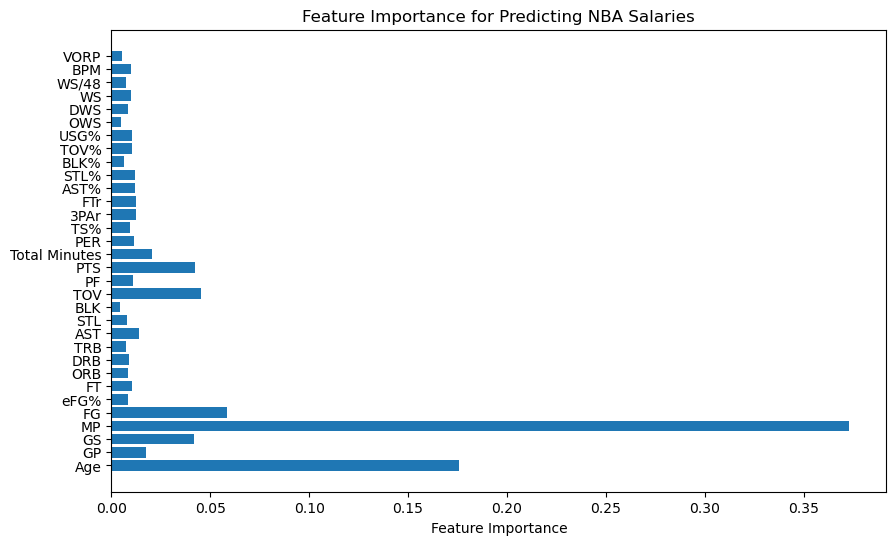

In [139]:
import matplotlib.pyplot as plt

#feature importance
feature_importances = rf.feature_importances_

#plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Predicting NBA Salaries')
plt.show()


In [141]:
#create a dataFrame to associate feature names with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

#number of features I want
num = 10

#sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#showing top 10 features
top_n_features = feature_importance_df.head(num)['Feature'].tolist()
print(f"Top 10 Features: {top_n_features}")

#subset the dataset with the top 10 features
X_train_top = X_train[top_n_features]
X_test_top = X_test[top_n_features]

#train new model with data
rf_top = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_top.fit(X_train_top, y_train_log)

Top 10 Features: ['MP', 'Age', 'FG', 'TOV', 'PTS', 'GS', 'Total Minutes', 'GP', 'AST', 'FTr']


RandomForestRegressor(max_depth=10, random_state=42)

In [143]:
#predict and convert back to original scale
y_pred_log_top = rf_top.predict(X_test_top)
y_pred_top = np.expm1(y_pred_log_top)
y_test = np.expm1(y_test_log)

MAE: 3,681,159.55
R² Score: 0.7840
MSLE: 0.4164


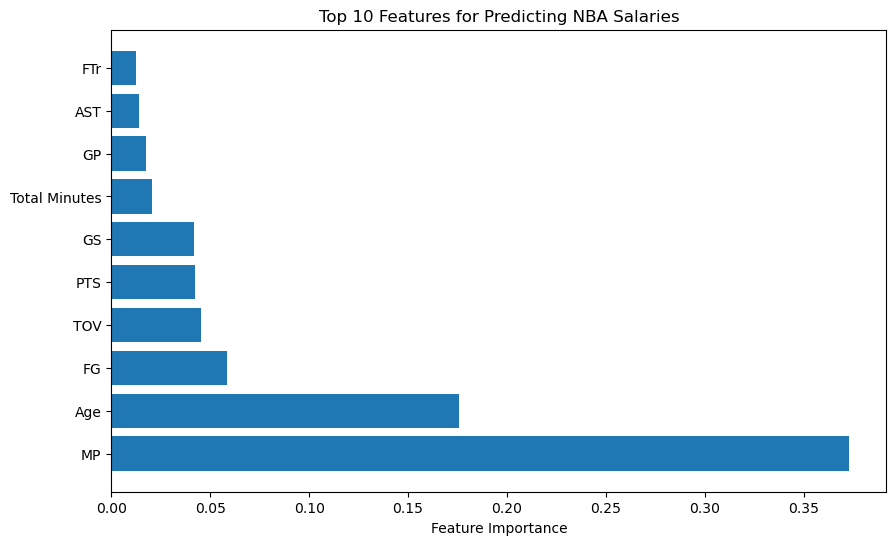

In [145]:
#evaluation
mae_top = mean_absolute_error(y_test, y_pred_top)
r2_top = r2_score(y_test, y_pred_top)
msle_top = mean_squared_log_error(y_test, y_pred)

print(f"MAE: {mae_top:,.2f}")
print(f"R² Score: {r2_top:.4f}")
print(f"MSLE: {msle_top:.4f}")

# Plot the top features' importances
plt.figure(figsize=(10, 6))
plt.barh(top_n_features, feature_importance_df.head(num)['Importance'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Features for Predicting NBA Salaries')
plt.show()

Didn't see much improvement from feature selection. We want to try and see if Grid Search algorithm can help make a better model.

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

#define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200], #number of trees in the forest
    'max_depth': [5, 10, 15, None], #maximum depth of each tree
    'min_samples_split': [2, 5, 10], #minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4], #minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'], #number of features to consider for a split
    'bootstrap': [True, False] #whether bootstrap samples are used
}

#set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

#fit GridSearchCV to the data
grid_search.fit(X_train_top, y_train_log)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=10, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 10, 15, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error', verbose=2)

In [151]:
#get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

#evaluate performance with the best model
best_rf = grid_search.best_estimator_

#predict and convert back to original scale
y_pred_log_best = best_rf.predict(X_test_top)
y_pred_best = np.expm1(y_pred_log_best)

Best Hyperparameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [153]:
#evaluation
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
msle_best = mean_squared_log_error(y_test, y_pred)

print(f"Test MAE (Best Hyperparameters): {mae_best:,.2f}")
print(f"Test R² Score (Best Hyperparameters): {r2_best:.4f}")
print(f"MSLE: {msle_best:.4f}")

Test MAE (Best Hyperparameters): 3,733,983.14
Test R² Score (Best Hyperparameters): 0.7634
MSLE: 0.4164
